In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

c:\Users\abhin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here is null function is to find the data which is missing in our dataset

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we have used "seaborn" to visually represent the missing data and i have a cbar kwargs to give more details to the graph

<Axes: >

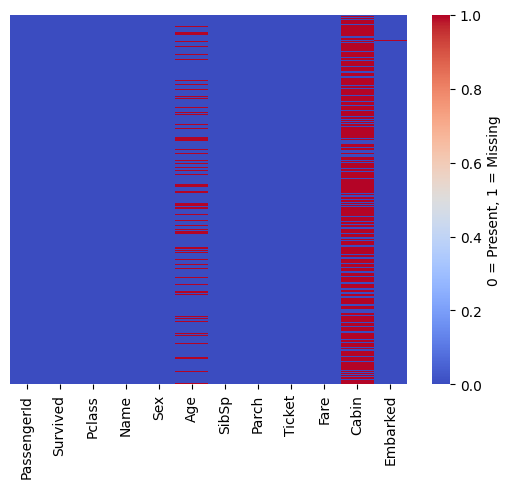

In [5]:
sns.heatmap(df.isnull(), yticklabels=False,cbar_kws={"label" : "0 = Present, 1 = Missing"}, cmap='coolwarm')

Question 1

How does survival rate vary across different passenger classes (pclass)?

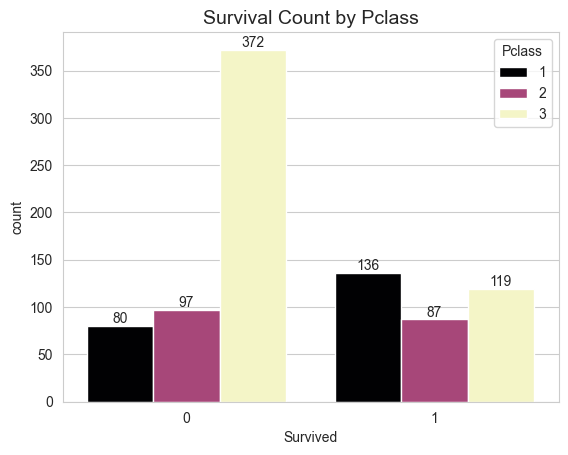

In [6]:
sns.set_style('whitegrid')
k=sns.countplot(x='Survived',hue='Pclass',data=df,palette="magma")
for container in k.containers:
    k.bar_label(container, fontsize=10) #automatically places correct values on each hue bar
plt.title("Survival Count by Pclass", fontsize=14) #to put title in the plot
plt.show() #to show the plot

IN THE ABOVE GRAPH WE HAVE DATA OF SURVIVAL OF THREE CLASSES

HERE,   Survived = 0 [allah ko payaare]

        Survived = 1 [allah ke bande]

So, most of the person that died are from 3rd class as it was the lowest class and people were obviously saved on priority basis.

The Pclass 1 class have the most survived passangers and less people died of Pclass 1      

Question 2

What is the relationship between passenger gender and survival?

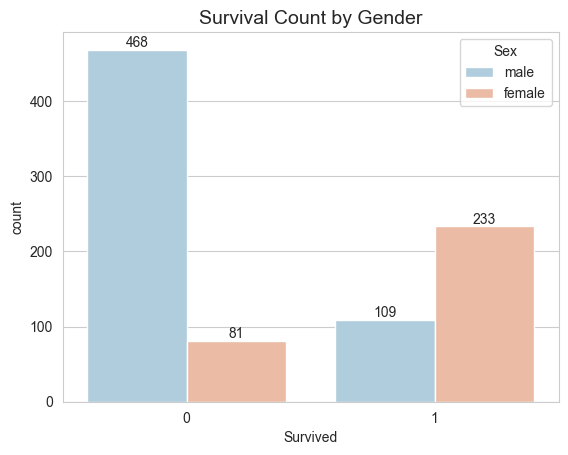

In [7]:
sns.set_style('whitegrid')
s=sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')  

for container in s.containers:
    s.bar_label(container, fontsize=10) #automatically places correct values on each hue bar
plt.title("Survival Count by Gender", fontsize=14) #to put title in the plot
plt.show() #to show the plot

SO,

The above graph shows the Survival rate by gender in the titanic


Question 3

How does age distribution differ between survivors and non-survivors?

C:\Users\abhin\AppData\Local\Temp\ipykernel_27256\3297218224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=False,color='yellow')


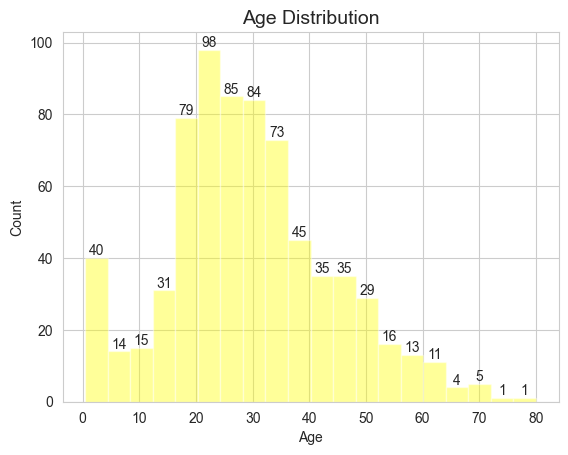

In [8]:
sns.distplot(df['Age'].dropna(),kde=False,color='yellow')
for container in plt.gca().containers: #to get the current axis
    plt.gca().bar_label(container, fontsize=10)    #automatically places correct values on each bar
plt.title("Age Distribution", fontsize=14) #to put title in the plot    
plt.xlabel("Age") #to put label in x-axis
plt.ylabel("Count") #to put label in y-axis
plt.show()  

In [9]:
df["Age"].notnull().sum()

714

so here we can see there is no null value and if we do the sum of the above all the age count then we will get 714

C:\Users\abhin\AppData\Local\Temp\ipykernel_27256\913863964.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


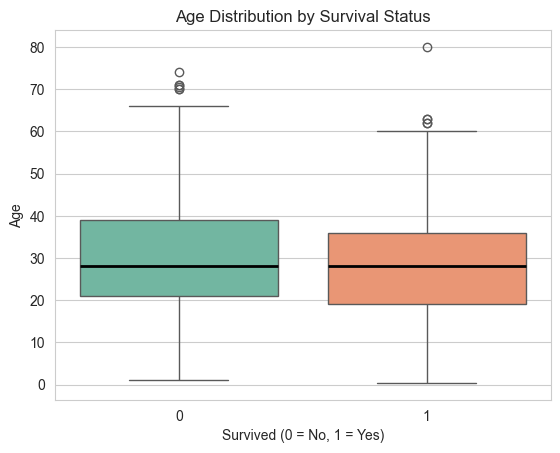

In [10]:
sns.boxplot(
    x="Survived",y="Age",data=df, palette="Set2",#  setting x and y axis data and color palette
    medianprops={"color":"black","linewidth":2} #customizing median line    
)

plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.title("Age Distribution by Survival Status")
plt.show()


Question 4

Does family size (sibsp + parch) affect survival probability?    

In [11]:
df["FamilySize"] = df["SibSp"] + df["Parch"]
df.groupby("FamilySize")["Survived"].mean()



FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

C:\Users\abhin\AppData\Local\Temp\ipykernel_27256\395194668.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x="FamilySize",y="Survived",data=df,ci=None)#plotting survival probability against family size


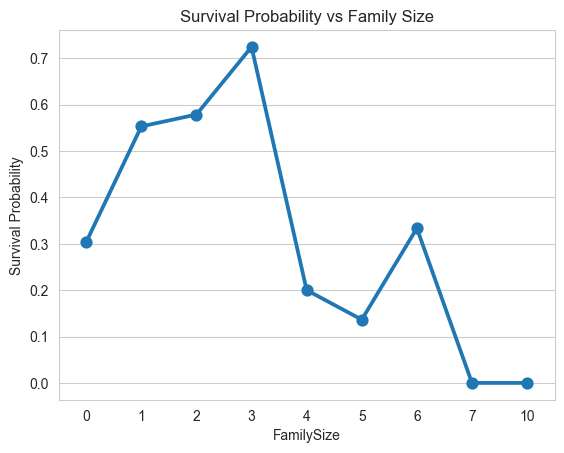

In [12]:
sns.pointplot(x="FamilySize",y="Survived",data=df,ci=None)#plotting survival probability against family size

plt.title("Survival Probability vs Family Size")
plt.ylabel("Survival Probability")
plt.show()


In the Titanic dataset:

SibSp = number of siblings / spouses aboard

Parch = number of parents / children aboard

So, FamilySize = SibSp + Parch

This tells us how many family members a passenger had with them.

By the point plot we can conclude if the family size really affects the surviival rate


Question 5

How does fare paid relate to survival chances?

C:\Users\abhin\AppData\Local\Temp\ipykernel_27256\3828529519.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived",y="Fare",data=df,palette="Set2",inner="quartile")


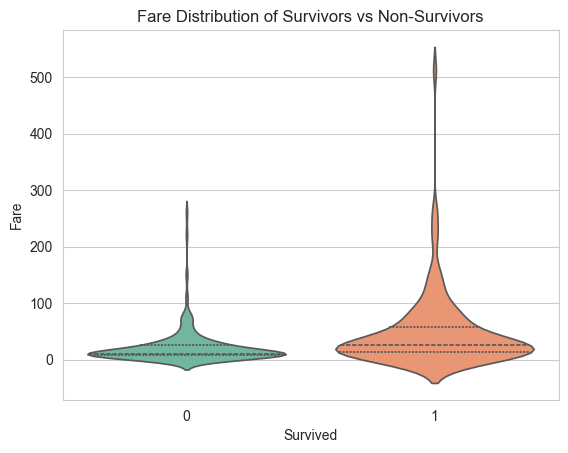

In [13]:
sns.violinplot(x="Survived",y="Fare",data=df,palette="Set2",inner="quartile")

plt.title("Fare Distribution of Survivors vs Non-Survivors")
plt.show()


In the Titanic dataset:

Fare is the amount paid for the ticket

It is strongly associated with:

Passenger class (1st, 2nd, 3rd)

Cabin location

Socio-economic status

So fare is an indirect indicator of privilege and access.

By this violin plot we can easily determine the survival rate by fare price.

Question 6

What percentage of passengers survived overall?

In [14]:
passanger_survival = df["Survived"].mean()*100
print(passanger_survival)

38.38383838383838


Question 7

What is the survival rate for each gender?

In [15]:
#Male
male_survival = df[df["Sex"] == "male"]["Survived"].mean()*100
print("male survived = ",male_survival)

#Female
Female_survival = df[df["Sex"]=="female"]["Survived"].mean()*100
print("female survived = ",Female_survival)

male survived =  18.890814558058924
female survived =  74.20382165605095


Question 8

What is the average age of survivors vs non-survivors?

In [16]:
#Average age of survivors
Average_age_survival = df[df["Survived"] == 1]["Age"].mean()
print("Average age survived",Average_age_survival)

#Average age of non-survivors
Average_age_nonsurvival = df[df["Survived"] == 0]["Age"].mean()
print("Average age non-survived",Average_age_nonsurvival)

Average age survived 28.343689655172415
Average age non-survived 30.62617924528302


Question 9

What is the median fare paid by survivors compared to non-survivors?

In [17]:
median_fare = df[df["Survived"] == 1]["Fare"].median()
print("Median fare of survived passangers",median_fare)

median_fare_nonsurvived = df[df["Survived"] == 0]["Fare"].median()
print("Median fare of non-survived passangers",median_fare_nonsurvived)

Median fare of survived passangers 26.0
Median fare of non-survived passangers 10.5


Question 10

What proportion of passengers traveled alone versus with family?

In [18]:
travel_withfamily = df[df["FamilySize"] > 0]["Survived"].mean()*100 #if we consider family size greater than 0
print("Survival rate of passangers traveling with family",travel_withfamily)

travel_alone = df[df["FamilySize"] == 0]["Survived"].mean()*100 #if we consider family size equal to 0
print("Survival rate of passangers traveling alone",travel_alone)

Survival rate of passangers traveling with family 50.56497175141242
Survival rate of passangers traveling alone 30.353817504655495


In [19]:
sviz = sv.analyze(df)
sviz.show_html('titanic_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report titanic_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
